<a href="https://colab.research.google.com/github/Gauravmehra1/NYCTaxiData.csv/blob/main/Copy_of_Copy_of_NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [93]:
import pandas as pd 
import numpy as np 
import datetime as dt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score as r2, mean_squared_error as mse
import math
from sklearn.ensemble import RandomForestRegressor 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
from google.colab import drive 
drive.mount ('/content/drive')

Mounted at /content/drive


In [3]:
File ='/content/drive/MyDrive/ML/NYCTaxiData.csv'
df = pd.read_csv(File)

In [4]:
df.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [5]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [6]:
df.shape

(1458644, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [8]:
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [9]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


#**ID**

In [13]:
df['id'].head()

0    id2875421
1    id2377394
2    id3858529
3    id3504673
4    id2181028
Name: id, dtype: object

In [14]:
df['id'].unique()

array(['id2875421', 'id2377394', 'id3858529', ..., 'id2304944',
       'id2714485', 'id1209952'], dtype=object)

In [15]:
df['id'].value_counts()

id2875421    1
id2249290    1
id2484008    1
id3901436    1
id1265174    1
            ..
id2478352    1
id1159014    1
id3007971    1
id3965191    1
id1209952    1
Name: id, Length: 1458644, dtype: int64

#**vendor_id**

In [22]:
df['vendor_id'].unique

<bound method Series.unique of 0          2
1          1
2          2
3          2
4          2
          ..
1458639    2
1458640    1
1458641    2
1458642    1
1458643    1
Name: vendor_id, Length: 1458644, dtype: int64>

In [23]:
#duration of per vendors
df['vendor_id'].value_counts()

2    780302
1    678342
Name: vendor_id, dtype: int64

Text(0, 0.5, 'count')

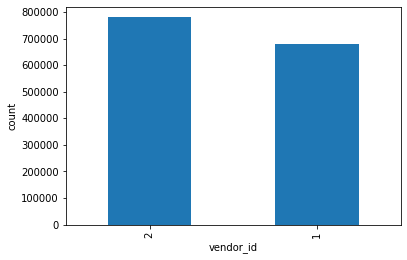

In [24]:
# graph of vendor_id
df['vendor_id'].value_counts().plot(kind= 'bar')
plt.xlabel ('vendor_id')
plt.ylabel ('count')

#**pickup_datetime**

In [25]:
df['pickup_datetime'].head()

0    2016-03-14 17:24:55
1    2016-06-12 00:43:35
2    2016-01-19 11:35:24
3    2016-04-06 19:32:31
4    2016-03-26 13:30:55
Name: pickup_datetime, dtype: object

In [26]:
df['pickup_datetime'].unique()

array(['2016-03-14 17:24:55', '2016-06-12 00:43:35',
       '2016-01-19 11:35:24', ..., '2016-01-10 07:35:15',
       '2016-04-22 06:57:41', '2016-01-05 15:56:26'], dtype=object)

In [27]:
#converting our date time values in datetime objects
df['pickup_datetime']= pd.to_datetime(df['pickup_datetime'])
df['pickup_datetime']

0         2016-03-14 17:24:55
1         2016-06-12 00:43:35
2         2016-01-19 11:35:24
3         2016-04-06 19:32:31
4         2016-03-26 13:30:55
                  ...        
1458639   2016-04-08 13:31:04
1458640   2016-01-10 07:35:15
1458641   2016-04-22 06:57:41
1458642   2016-01-05 15:56:26
1458643   2016-04-05 14:44:25
Name: pickup_datetime, Length: 1458644, dtype: datetime64[ns]

In [28]:
#taking out dates from our date time object
df['date_pickup']=df['pickup_datetime'].dt.date
df['date_pickup']

0          2016-03-14
1          2016-06-12
2          2016-01-19
3          2016-04-06
4          2016-03-26
              ...    
1458639    2016-04-08
1458640    2016-01-10
1458641    2016-04-22
1458642    2016-01-05
1458643    2016-04-05
Name: date_pickup, Length: 1458644, dtype: object

In [29]:
df['date_pickup']= pd.to_datetime(df['date_pickup'])
df['date_pickup'].dt.strftime('%Y-%b-%d')

0          2016-Mar-14
1          2016-Jun-12
2          2016-Jan-19
3          2016-Apr-06
4          2016-Mar-26
              ...     
1458639    2016-Apr-08
1458640    2016-Jan-10
1458641    2016-Apr-22
1458642    2016-Jan-05
1458643    2016-Apr-05
Name: date_pickup, Length: 1458644, dtype: object

In [30]:
#Taking out time from date time 
df['time_pickup']=df['pickup_datetime'].dt.time
df['time_pickup']

0          17:24:55
1          00:43:35
2          11:35:24
3          19:32:31
4          13:30:55
             ...   
1458639    13:31:04
1458640    07:35:15
1458641    06:57:41
1458642    15:56:26
1458643    14:44:25
Name: time_pickup, Length: 1458644, dtype: object

In [31]:
df['pickup_datetime'].max()

Timestamp('2016-06-30 23:59:39')

In [32]:
#creating  new fretures from our date time object 
df['pickup_day']=df['pickup_datetime'].dt.day_name()
df['hour']= df['pickup_datetime'].dt.hour
df['minute']= df['pickup_datetime'].dt.minute
df['month']=df['pickup_datetime'].dt.month_name()

In [33]:
#function for check the time of our trip 
def time_day(x):
  if x in range(6 ,12):
    return('morning')
  elif x in range(12 , 16):
     return('afternoon')
  elif x in range(16 , 22 ):
    return('evening')
  else:
    return('night')

In [34]:
df['time_day']= df['hour'].apply(time_day)
df['time_day']

0            evening
1              night
2            morning
3            evening
4          afternoon
             ...    
1458639    afternoon
1458640      morning
1458641      morning
1458642    afternoon
1458643    afternoon
Name: time_day, Length: 1458644, dtype: object

In [35]:
#Making new coloumns by cleaning our old coloumn 
con=pd.concat([df['date_pickup'],df['pickup_day'],df['hour'],df['month'],df['time_pickup'],df['time_day'],df['minute']],axis=1)
con

,date_pickup,pickup_day,hour,month,time_pickup,time_day,minute
0,2016-03-14,Monday,17,March,17:24:55,evening,24
1,2016-06-12,Sunday,0,June,00:43:35,night,43
2,2016-01-19,Tuesday,11,January,11:35:24,morning,35
3,2016-04-06,Wednesday,19,April,19:32:31,evening,32
4,2016-03-26,Saturday,13,March,13:30:55,afternoon,30
...,...,...,...,...,...,...,...
1458639,2016-04-08,Friday,13,April,13:31:04,afternoon,31
1458640,2016-01-10,Sunday,7,January,07:35:15,morning,35
1458641,2016-04-22,Friday,6,April,06:57:41,morning,57
1458642,2016-01-05,Tuesday,15,January,15:56:26,afternoon,56


Text(0, 0.5, 'no of pickup ')

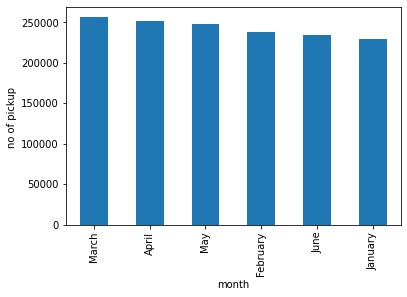

In [36]:
#graph of month
df['month'].value_counts().plot(kind='bar')
plt.xlabel ('month')
plt.ylabel ('no of pickup ')

Text(0, 0.5, 'no of pickup ')

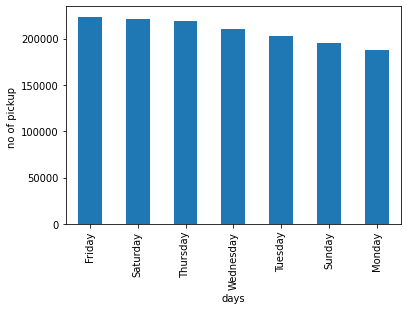

In [37]:
#graph of days
df['pickup_day'].value_counts().plot(kind='bar')
plt.xlabel ('days')
plt.ylabel ('no of pickup ')

Text(0, 0.5, 'no of pickup ')

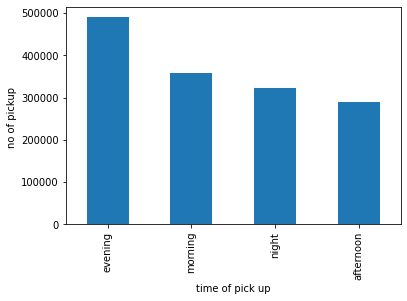

In [38]:
#graph of time pick up
df['time_day'].value_counts().plot(kind='bar')
plt.xlabel ('time of pick up')
plt.ylabel ('no of pickup ')

Text(0, 0.5, 'no of pickup ')

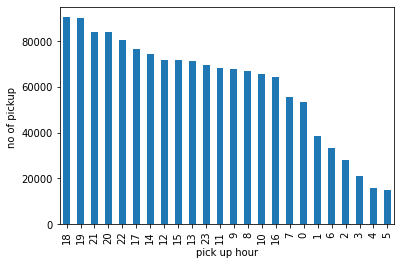

In [39]:
#graph of hours
df['hour'].value_counts().plot(kind='bar')
plt.xlabel ('pick up hour')
plt.ylabel ('no of pickup ')

#**dropoff_datetime**


In [40]:
df['dropoff_datetime'].unique()

array(['2016-03-14 17:32:30', '2016-06-12 00:54:38',
       '2016-01-19 12:10:48', ..., '2016-04-22 07:10:25',
       '2016-01-05 16:02:39', '2016-04-05 14:47:43'], dtype=object)

In [41]:
#converting our date time values in datetime objects
df['dropoff_datetime']=pd.to_datetime(df['dropoff_datetime'])
df['dropoff_datetime']

0         2016-03-14 17:32:30
1         2016-06-12 00:54:38
2         2016-01-19 12:10:48
3         2016-04-06 19:39:40
4         2016-03-26 13:38:10
                  ...        
1458639   2016-04-08 13:44:02
1458640   2016-01-10 07:46:10
1458641   2016-04-22 07:10:25
1458642   2016-01-05 16:02:39
1458643   2016-04-05 14:47:43
Name: dropoff_datetime, Length: 1458644, dtype: datetime64[ns]

In [42]:
#Taking drop date from date time
df['drop_date']=df['dropoff_datetime'].dt.date
df['drop_date']

0          2016-03-14
1          2016-06-12
2          2016-01-19
3          2016-04-06
4          2016-03-26
              ...    
1458639    2016-04-08
1458640    2016-01-10
1458641    2016-04-22
1458642    2016-01-05
1458643    2016-04-05
Name: drop_date, Length: 1458644, dtype: object

In [43]:
#taking drop time from date time 
df['drop_time']=df['dropoff_datetime'].dt.time
df['drop_time']

0          17:32:30
1          00:54:38
2          12:10:48
3          19:39:40
4          13:38:10
             ...   
1458639    13:44:02
1458640    07:46:10
1458641    07:10:25
1458642    16:02:39
1458643    14:47:43
Name: drop_time, Length: 1458644, dtype: object

In [44]:
#creating new freatures from drop_date time 
df['drop_hour']=df['dropoff_datetime'].dt.hour
df['drop_day']=df['dropoff_datetime'].dt.day_name()
df['drop_month']=df['dropoff_datetime'].dt.month_name()
df['drop_minute']=df['dropoff_datetime'].dt.minute


In [45]:
#function for check the time of our trip 
def drop(y):
  if y in range(6,12):
    return('morning')
  elif y in range(12,16):
    return('afternoon')
  elif y in range(16,22):
    return('evening')
  else:
    return('night')

In [46]:
df['drop']=df['drop_hour'].apply(drop)
df['drop']

0            evening
1              night
2          afternoon
3            evening
4          afternoon
             ...    
1458639    afternoon
1458640      morning
1458641      morning
1458642      evening
1458643    afternoon
Name: drop, Length: 1458644, dtype: object

In [47]:
#Making new coloumns by cleaning our old coloumn 
pd.concat([df['drop_date'],df['drop_day'],df['drop_hour'],df['drop_time'],df['drop_month'],df['drop'],df['drop_minute']],axis=1)


,drop_date,drop_day,drop_hour,drop_time,drop_month,drop,drop_minute
0,2016-03-14,Monday,17,17:32:30,March,evening,32
1,2016-06-12,Sunday,0,00:54:38,June,night,54
2,2016-01-19,Tuesday,12,12:10:48,January,afternoon,10
3,2016-04-06,Wednesday,19,19:39:40,April,evening,39
4,2016-03-26,Saturday,13,13:38:10,March,afternoon,38
...,...,...,...,...,...,...,...
1458639,2016-04-08,Friday,13,13:44:02,April,afternoon,44
1458640,2016-01-10,Sunday,7,07:46:10,January,morning,46
1458641,2016-04-22,Friday,7,07:10:25,April,morning,10
1458642,2016-01-05,Tuesday,16,16:02:39,January,evening,2


Text(0, 0.5, 'no of pickup ')

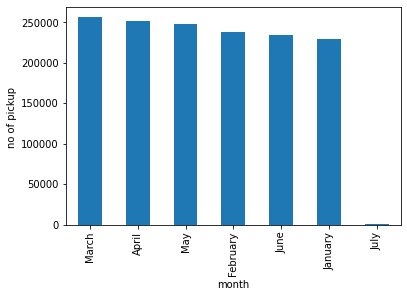

In [48]:
df['drop_month'].value_counts().plot(kind='bar')
plt.xlabel ('month')
plt.ylabel ('no of pickup ')

Text(0, 0.5, 'no of drop ')

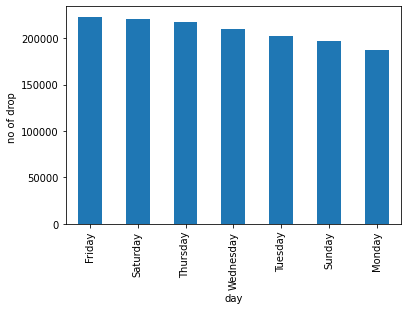

In [49]:
#graph of drop_day
df['drop_day'].value_counts().plot(kind='bar')
plt.xlabel ('day')
plt.ylabel ('no of drop ')

Text(0, 0.5, 'no of pickup ')

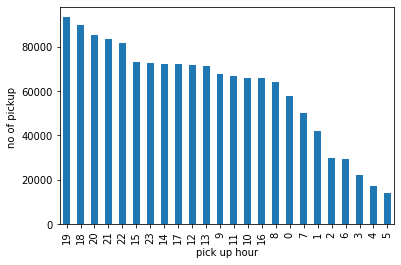

In [50]:
#graph of drop_hour
df['drop_hour'].value_counts().plot(kind='bar')
plt.xlabel ('pick up hour')
plt.ylabel ('no of pickup ')

Text(0, 0.5, 'no of drop ')

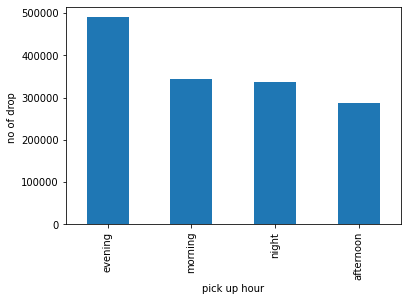

In [51]:
#graph of drop
df['drop'].value_counts().plot(kind='bar')
plt.xlabel ('pick up hour')
plt.ylabel ('no of drop ')

#**passenger_count**

In [52]:
df['passenger_count'].unique()

array([1, 6, 4, 2, 3, 5, 0, 7, 9, 8])

In [53]:
#numbers of our passenger
df['passenger_count'].value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

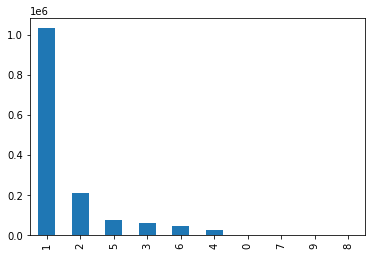

In [54]:
#graph of our passenger
df['passenger_count'].value_counts().plot(kind='bar')

#**pickup_longitude && pickup_latitude**

In [55]:
df['pickup_longitude'].unique()

array([-73.98215485, -73.98041534, -73.97902679, ..., -73.84746552,
       -73.89477539, -73.84131622])

In [56]:
df['pickup_longitude'].value_counts()

-73.982201    633
-73.982140    607
-73.982101    587
-73.982117    585
-73.982224    584
             ... 
-73.815033      1
-73.882843      1
-73.844650      1
-73.854591      1
-73.841316      1
Name: pickup_longitude, Length: 23047, dtype: int64

In [57]:
df['pickup_latitude'].value_counts()

40.774101    414
40.774090    411
40.774120    410
40.774109    392
40.774078    390
            ... 
40.689228      1
40.662701      1
40.652359      1
40.834091      1
40.823044      1
Name: pickup_latitude, Length: 45245, dtype: int64

In [58]:
from geopy.distance import great_circle

In [59]:
#function for pickup_lat,pickup_long,dropoff_lat,dropoff_long
def cal_distance(pickup_lat,pickup_long,dropoff_lat,dropoff_long):
 
 start_coordinates=(pickup_lat,pickup_long)
 stop_coordinates=(dropoff_lat,dropoff_long)
 
 return great_circle(start_coordinates,stop_coordinates).km

In [60]:
df['distance'] = df.apply(lambda x: cal_distance(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude'] ), axis=1)


In [61]:
##Making new coloumns for founding out the distance 
dis=pd.concat([df['drop_date'],df['drop_day'],df['drop_hour'],df['drop_time'],df['drop_month'],df['drop'],df['distance'],df['drop_minute']],axis=1)
dis


,drop_date,drop_day,drop_hour,drop_time,drop_month,drop,distance,drop_minute
0,2016-03-14,Monday,17,17:32:30,March,evening,1.498523,32
1,2016-06-12,Sunday,0,00:54:38,June,night,1.805510,54
2,2016-01-19,Tuesday,12,12:10:48,January,afternoon,6.385108,10
3,2016-04-06,Wednesday,19,19:39:40,April,evening,1.485501,39
4,2016-03-26,Saturday,13,13:38:10,March,afternoon,1.188590,38
...,...,...,...,...,...,...,...,...
1458639,2016-04-08,Friday,13,13:44:02,April,afternoon,1.225082,44
1458640,2016-01-10,Sunday,7,07:46:10,January,morning,6.049844,46
1458641,2016-04-22,Friday,7,07:10:25,April,morning,7.824617,10
1458642,2016-01-05,Tuesday,16,16:02:39,January,evening,1.092565,2


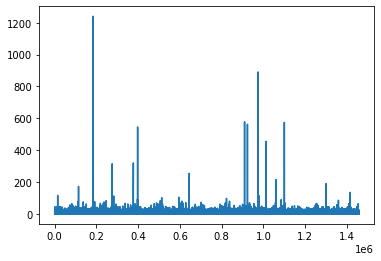

In [62]:
#graph of distance
plt.plot(df['distance'])

(array([1.452359e+06, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([1.0000e+00, 5.9060e+02, 1.1802e+03, 1.7698e+03, 2.3594e+03,
        2.9490e+03, 3.5386e+03, 4.1282e+03, 4.7178e+03, 5.3074e+03,
        5.8970e+03]),
 <a list of 10 Patch objects>)

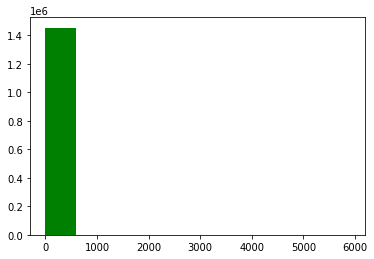

In [63]:
#graph of distance
plt.hist(df['distance'].value_counts(), color='green')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


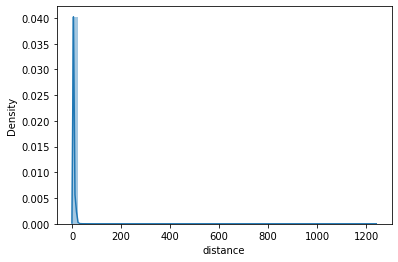

In [64]:
sns.distplot(df['distance'], hist=True)

#**store_and_fwd_flag**

In [65]:
df['store_and_fwd_flag'].value_counts()

N    1450599
Y       8045
Name: store_and_fwd_flag, dtype: int64

In [66]:
#checking our forward flag with vendor id
flag=df.groupby('vendor_id')['store_and_fwd_flag'].max().reset_index()
flag

,vendor_id,store_and_fwd_flag
0,1,Y
1,2,N


#**trip_duration**

In [67]:
df['trip_duration']

0           455
1           663
2          2124
3           429
4           435
           ... 
1458639     778
1458640     655
1458641     764
1458642     373
1458643     198
Name: trip_duration, Length: 1458644, dtype: int64

In [68]:
df['trip_duration'].value_counts()

368      1624
408      1584
348      1582
367      1581
358      1577
         ... 
7378        1
83250       1
6615        1
34014       1
6124        1
Name: trip_duration, Length: 7417, dtype: int64

In [69]:
df['trip_duration']=pd.to_datetime(df['trip_duration'])
df['trip_duration_hour'] = df['trip_duration'].dt.hour
df['trip_duration_hour']

0          0
1          0
2          0
3          0
4          0
          ..
1458639    0
1458640    0
1458641    0
1458642    0
1458643    0
Name: trip_duration_hour, Length: 1458644, dtype: int64

In [70]:
#Trip done be id 
trip=df.groupby('id')['trip_duration'].max().reset_index()
trip

,id,trip_duration
0,id0000001,1970-01-01 00:00:00.000001105
1,id0000003,1970-01-01 00:00:00.000001046
2,id0000005,1970-01-01 00:00:00.000000368
3,id0000008,1970-01-01 00:00:00.000000303
4,id0000009,1970-01-01 00:00:00.000000547
...,...,...
1458639,id3999988,1970-01-01 00:00:00.000003065
1458640,id3999992,1970-01-01 00:00:00.000000138
1458641,id3999998,1970-01-01 00:00:00.000001427
1458642,id3999999,1970-01-01 00:00:00.000000721


In [71]:
trip_con=pd.concat([df['drop_date'],df['drop_day'],df['drop_hour'],df['drop_time'],df['drop_month'],df['drop'],df['distance'],df['trip_duration_hour'],trip],axis=1)
trip_con


,drop_date,drop_day,drop_hour,drop_time,drop_month,drop,distance,trip_duration_hour,id,trip_duration
0,2016-03-14,Monday,17,17:32:30,March,evening,1.498523,0,id0000001,1970-01-01 00:00:00.000001105
1,2016-06-12,Sunday,0,00:54:38,June,night,1.805510,0,id0000003,1970-01-01 00:00:00.000001046
2,2016-01-19,Tuesday,12,12:10:48,January,afternoon,6.385108,0,id0000005,1970-01-01 00:00:00.000000368
3,2016-04-06,Wednesday,19,19:39:40,April,evening,1.485501,0,id0000008,1970-01-01 00:00:00.000000303
4,2016-03-26,Saturday,13,13:38:10,March,afternoon,1.188590,0,id0000009,1970-01-01 00:00:00.000000547
...,...,...,...,...,...,...,...,...,...,...
1458639,2016-04-08,Friday,13,13:44:02,April,afternoon,1.225082,0,id3999988,1970-01-01 00:00:00.000003065
1458640,2016-01-10,Sunday,7,07:46:10,January,morning,6.049844,0,id3999992,1970-01-01 00:00:00.000000138
1458641,2016-04-22,Friday,7,07:10:25,April,morning,7.824617,0,id3999998,1970-01-01 00:00:00.000001427
1458642,2016-01-05,Tuesday,16,16:02:39,January,evening,1.092565,0,id3999999,1970-01-01 00:00:00.000000721


In [72]:
trip_con.max()

drop_date                                2016-07-01
drop_day                                  Wednesday
drop_hour                                        23
drop_time                                  23:59:59
drop_month                                      May
drop                                          night
distance                                 1240.91043
trip_duration_hour                                0
id                                        id4000000
trip_duration         1970-01-01 00:00:00.003526282
dtype: object

#End of EDA

#**Bivariate Analysis**
in this we see relationships, patterns, and correlations between two variables.

In [73]:
group1 = df.groupby('pickup_hour').trip_duration.mean()
sns.pointplot(group1.index, group1.values)
plt.ylabel('Trip Duration (seconds)')
plt.xlabel('Pickup Hour')
plt.show()

KeyError: ignored

In [ ]:
group4 = df.groupby('vendor_id').trip_duration.mean()
sns.barplot(group4.index, group4.values)
plt.ylabel('Trip Duration (seconds)')
plt.xlabel('Vendor')
plt.show()

In [ ]:
plt.figure(figsize = (6,5))
plot_dur = df.loc[(df.trip_duration < 10000)]
sns.boxplot(x = "store_and_fwd_flag", y = "trip_duration", data = plot_dur)
plt.show()

In [ ]:
group5 = df.groupby('pickup_hour').distance.mean()
sns.pointplot(group5.index, group5.values)
plt.ylabel('Distance (km)')
plt.show()

In [ ]:
group8 = df.groupby('vendor_id').distance.mean()
sns.barplot(group8.index, group8.values)
plt.ylabel("Distance km")
plt.show()


In [ ]:
plt.scatter(df.trip_duration, df.distance , s=50, alpha=0.9)
plt.ylabel('Distance')
plt.xlabel('Trip Duration')
plt.show()

In [ ]:
dur_dist = df.loc[(df.distance < 50) & (df.trip_duration < 1000), ['distance','trip_duration']]
plt.scatter(dur_dist.trip_duration, dur_dist.distance , s=4, alpha=0.8)
plt.ylabel('Distance')
plt.xlabel('Trip Duration')
plt.show()

In [ ]:
df.groupby('passenger_count').vendor_id.value_counts().reset_index(name='count').pivot("passenger_count","vendor_id","count").plot(kind='bar')
plt.show()

#**FEATURE ENGINEERING**

In [74]:
#Calculate and assign new columns to the dataframe such as year,
#month ,day_num,hour and minute which will help us to gain more insights from the data.
df["year"] = df["pickup_datetime"].apply(lambda x: x.year)
df["month"] = df["pickup_datetime"].apply(lambda x: x.month)
df["day_num"] = df["pickup_datetime"].apply(lambda x: x.day)
df["hour"] = df["pickup_datetime"].apply(lambda x: x.hour)
df["minute"] = df["pickup_datetime"].apply(lambda x: x.minute)

In [75]:
#Dummify all the categorical features like "store_and_fwd_flag, Day" except the label i.e. "trip_duration"
df= pd.get_dummies(df, columns=["store_and_fwd_flag", "pickup_day"], prefix=["store_and_fwd_flag",'Day'])

In [76]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,...,day_num,store_and_fwd_flag_N,store_and_fwd_flag_Y,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,1970-01-01 00:00:00.000000455,...,14,1,0,0,1,0,0,0,0,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,1970-01-01 00:00:00.000000663,...,12,1,0,0,0,0,1,0,0,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,1970-01-01 00:00:00.000002124,...,19,1,0,0,0,0,0,0,1,0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,1970-01-01 00:00:00.000000429,...,6,1,0,0,0,0,0,0,0,1
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,1970-01-01 00:00:00.000000435,...,26,1,0,0,0,1,0,0,0,0


In [77]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration', 'date_pickup',
       'time_pickup', 'hour', 'minute', 'month', 'time_day', 'drop_date',
       'drop_time', 'drop_hour', 'drop_day', 'drop_month', 'drop_minute',
       'drop', 'distance', 'trip_duration_hour', 'year', 'day_num',
       'store_and_fwd_flag_N', 'store_and_fwd_flag_Y', 'Day_Friday',
       'Day_Monday', 'Day_Saturday', 'Day_Sunday', 'Day_Thursday',
       'Day_Tuesday', 'Day_Wednesday'],
      dtype='object')

In [78]:
features=['vendor_id','passenger_count','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','distance','month','hour','minute',
          'store_and_fwd_flag_N','store_and_fwd_flag_Y']

In [79]:
newdata=['vendor_id','passenger_count','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','distance','month','hour','minute',
          'store_and_fwd_flag_N','store_and_fwd_flag_Y','trip_duration_hour']

In [80]:
df.shape

(1458644, 36)

In [81]:
#For Standarization  apply z-score
from scipy.stats import zscore
#Train test split
X = df[features].apply(zscore)[:100000]
y=df['trip_duration_hour'][:100000]

In [82]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [83]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(80000, 12) (80000,)
(20000, 12) (20000,)


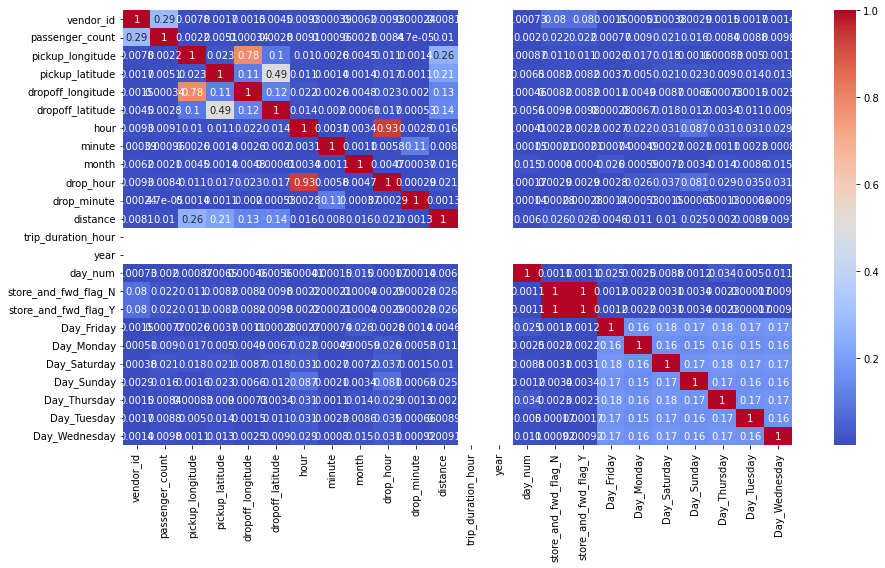

In [84]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [85]:
X_train[0:10]

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,distance,month,hour,minute,store_and_fwd_flag_N,store_and_fwd_flag_Y
10382,0.932380,-0.505637,0.336997,0.655783,0.045962,1.323726,0.001981,0.882302,1.311550,-1.130764,0.074471,-0.074471
73171,0.932380,-0.505637,-0.119463,0.701957,-0.147032,-0.215734,-0.025011,-1.497182,0.217747,1.235798,0.074471,-0.074471
30938,-1.072524,-0.505637,-0.063939,-0.065828,0.203856,0.652418,-0.021310,-1.497182,-0.876055,1.639845,0.074471,-0.074471
99310,0.932380,-0.505637,0.116192,0.258433,-0.343158,-0.193095,-0.062258,-0.307440,1.155293,1.466682,0.074471,-0.074471
58959,-1.072524,-0.505637,-0.045646,1.113577,0.116917,1.114554,-0.548768,0.287431,1.311550,1.697566,0.074471,-0.074471
2893,0.932380,-0.505637,-0.118065,-1.832383,0.050390,-1.565898,-0.533029,0.287431,-2.126116,0.312262,0.074471,-0.074471
14653,-1.072524,-0.505637,-0.204579,0.419693,-0.235484,0.204418,-0.650778,-1.497182,-1.344828,-1.419369,0.074471,-0.074471
65215,0.932380,2.537943,-0.184780,-0.415612,0.158929,0.216322,-0.051070,-0.307440,-1.969858,-0.438112,0.074471,-0.074471
90321,0.932380,1.777048,-0.079219,0.782819,0.068317,1.094147,-0.374835,0.287431,0.842778,0.831751,0.074471,-0.074471
90300,0.932380,3.298838,-0.175526,0.229313,3.386692,-0.484002,4.174469,-0.902311,-0.407283,1.639845,0.074471,-0.074471


In [94]:
from matplotlib import legend
# Function for evaluation metric for regression
def EvaluationMetric(Xt,yt,yp,disp="on"):
  ''' Take the different set of parameter and prints evaluation metrics '''
  MSE=round(mean_squared_error(y_true=yt,y_pred=yp),4)
  RMSE=(np.sqrt(MSE))
  R2=(r2(y_true=yt,y_pred=yp))
  Adjusted_R2=(1-(1-r2(yt, yp))*((Xt.shape[0]-1)/(Xt.shape[0]-Xt.shape[1]-1)))
  if disp=="on":
    print("MSE :",MSE,"RMSE :", RMSE)
    print("R2 :",R2,"Adjusted R2 :",Adjusted_R2)

  #Plotting Actual and Predicted Values
  plt.figure(figsize=(18,6))
  plt.plot((yp)[:100]) 
  plt.plot((np.array(yt)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.title('Actual and Predicted Time Duration')


  
  return (MSE,RMSE,R2,Adjusted_R2) 

In [87]:
# Instance the linear regression object
reg = LinearRegression().fit(X_train, y_train)

In [88]:
reg.score(X_train, y_train)

1.0

In [89]:
y_pred_train = reg.predict(X_train)

In [90]:
y_pred_test = reg.predict(X_test)

MSE : 0.0 RMSE : 0.0
R2 : 1.0 Adjusted R2 : 1.0


(0.0, 0.0, 1.0, 1.0)

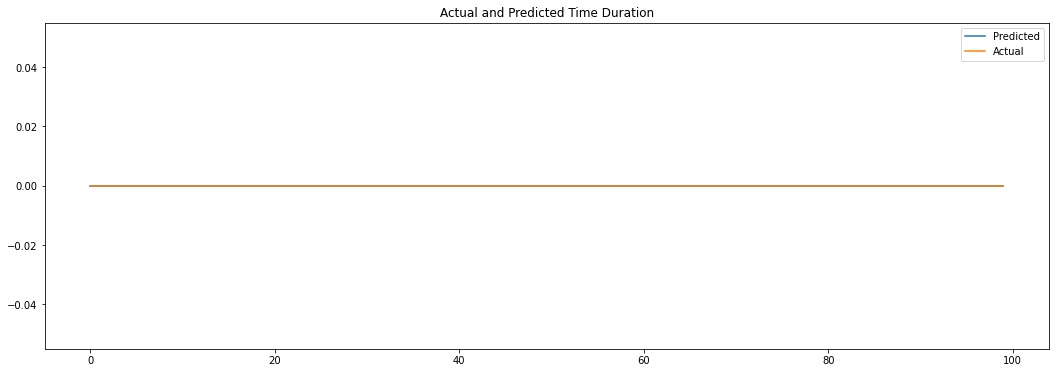

In [95]:
#Evaluation metrics for Train set
EvaluationMetric(X_train,y_train,y_pred_train)